In [1]:
import pandas as pd
import os

In [2]:
# load csv
directory = '../data'
filename = 'TADPOLE_D1_D2.csv'

csv_path = os.path.join(directory, filename)
df = pd.read_csv(csv_path)

//anaconda3/envs/baylon/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3050: DtypeWarning: Columns (471,473,474,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,569,570,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,599,601,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,624,625,626,627,628,629,630,631,632,633,634,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,72

In [3]:
df.sample(10)

,RID,PTID,VISCODE,SITE,D1,D2,COLPROT,ORIGPROT,EXAMDATE,DX_bl,...,PHASE_UPENNBIOMK9_04_19_17,BATCH_UPENNBIOMK9_04_19_17,KIT_UPENNBIOMK9_04_19_17,STDS_UPENNBIOMK9_04_19_17,RUNDATE_UPENNBIOMK9_04_19_17,ABETA_UPENNBIOMK9_04_19_17,TAU_UPENNBIOMK9_04_19_17,PTAU_UPENNBIOMK9_04_19_17,COMMENT_UPENNBIOMK9_04_19_17,update_stamp_UPENNBIOMK9_04_19_17
11896,4243,023_S_4243,m36,23,1,1,ADNI2,ADNI2,2015-03-06,LMCI,...,,,,,,,,,,
7039,534,099_S_0534,m30,99,1,0,ADNI1,ADNI1,2008-11-21,CN,...,,,,,,,,,,
11126,1346,052_S_1346,m84,52,1,1,ADNI2,ADNI1,2014-04-02,LMCI,...,,,,,,,,,,
6707,372,099_S_0372,bl,99,1,0,ADNI1,ADNI1,2006-04-26,AD,...,ADNI1,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2017-01-19,967,290,28.66,NaN,2017-04-20 14:39:54.0
4170,4455,109_S_4455,m06,109,1,1,ADNI2,ADNI2,2012-10-04,EMCI,...,,,,,,,,,,
4930,5109,027_S_5109,bl,27,1,1,ADNI2,ADNI2,2013-04-01,SMC,...,ADNI2,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2016-12-15,771.9,207.2,17.63,NaN,2017-04-20 14:39:56.0
5546,2047,098_S_2047,m12,98,1,0,ADNI2,ADNIGO,2011-08-30,EMCI,...,,,,,,,,,,
3346,2347,129_S_2347,bl,129,1,1,ADNIGO,ADNIGO,2011-04-25,EMCI,...,ADNIGO,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2016-12-02,1010,294.4,24.18,NaN,2017-04-20 14:39:55.0
9217,2151,128_S_2151,m30,128,1,1,ADNI2,ADNIGO,2013-08-13,EMCI,...,,,,,,,,,,
9293,2234,127_S_2234,m24,127,1,1,ADNI2,ADNIGO,2012-11-27,EMCI,...,ADNI2,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2017-01-03,1857,218.6,18.2,Recalculated ABETA result = 1857 pg/mL,2017-04-20 14:39:55.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12741 entries, 0 to 12740
Columns: 1907 entries, RID to update_stamp_UPENNBIOMK9_04_19_17
dtypes: float64(72), int64(8), object(1827)
memory usage: 185.4+ MB


In [6]:
# <-- This cell needs to be checked!!

# # add the age at exam
df.EXAMDATE = pd.to_datetime(df.EXAMDATE)
df_grouped = df.groupby('RID').apply(lambda x:(x['EXAMDATE']-x['EXAMDATE'].min()).dt.days/365.25 + x['AGE'].min())
df_grouped.sort_index(inplace=True)
df.sort_values(by=['RID','EXAMDATE'], inplace=True)
df['AGE_AT_EXAM'] = df_grouped.values
df['AGE_INT'] = df['AGE_AT_EXAM'].apply(int)
# df.reset_index(drop=True)


In [93]:
# preprocessing

dx_map = {
        'MCI': 'MCI',
        'NL': 'CN',
        'Dementia': 'AD',
        'MCI to Dementia': 'AD',
        'NL to MCI': 'MCI',
        'MCI to NL': 'CN',
        'Dementia to MCI': 'MCI',
        'NL to Dementia': 'AD'
    }

df['diagnosis'] = df['DX'].map(dx_map)

# bear in mind that here we make no distrinction between catagorical and numerical fields yet

# these are the suggested biomarkers for those unfamilier with ADNI data
# according to https://tadpole.grand-challenge.org/Data/
features = {
    'dataset': ['D1', 'D2'],
    'prediction': ['diagnosis', 'ADAS13', 'Ventricles'],
    'cognitive_tests': ['CDRSB', 'ADAS11', 'MMSE', 'RAVLT_immediate'],
    'mri': ['Hippocampus', 'WholeBrain', 'Entorhinal', 'MidTemp'],
    'pet': ['FDG', 'AV45'],
    'csf': ['ABETA_UPENNBIOMK9_04_19_17', 'TAU_UPENNBIOMK9_04_19_17', 'PTAU_UPENNBIOMK9_04_19_17'],
    'risk_factors': ['APOE4', 'AGE_AT_EXAM']
}

columns_of_interest = []
for feature_list in features.values():
    columns_of_interest += feature_list

df[columns_of_interest]

,D1,D2,diagnosis,ADAS13,Ventricles,CDRSB,ADAS11,MMSE,RAVLT_immediate,Hippocampus,WholeBrain,Entorhinal,MidTemp,FDG,AV45,ABETA_UPENNBIOMK9_04_19_17,TAU_UPENNBIOMK9_04_19_17,PTAU_UPENNBIOMK9_04_19_17,APOE4,AGE_AT_EXAM
0,1,1,CN,18.67,118233.0,0.0,10.67,28.0,44.0,8336.0,1229740.0,4177.0,27936.0,1.36926,NaN,NaN,NaN,NaN,0.0,74.300000
5723,1,1,CN,19.67,NaN,0.0,10.67,28.0,40.0,NaN,NaN,NaN,NaN,1.21655,NaN,NaN,NaN,NaN,0.0,74.790075
5724,1,1,CN,20.00,NaN,0.0,12.00,29.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,77.267830
5725,1,1,CN,23.00,NaN,0.0,14.00,28.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,79.337645
5726,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,79.783915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10802,1,1,CN,18.00,NaN,0.5,11.00,29.0,28.0,5928.0,NaN,NaN,NaN,1.16317,1.31903,416.8,88.69,8.53,1.0,75.500000
10803,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,75.677960
12277,1,1,CN,18.00,NaN,2.0,11.00,26.0,32.0,NaN,NaN,NaN,NaN,NaN,1.27419,NaN,NaN,NaN,1.0,77.490418
10804,1,1,CN,14.00,18633.0,0.0,9.00,29.0,38.0,10602.0,1486040.0,4701.0,32189.0,1.42926,1.13838,1460.0,224.90,20.90,0.0,69.300000


In [94]:
df[columns_of_interest].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12741 entries, 0 to 12302
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   D1                          12741 non-null  int64  
 1   D2                          12741 non-null  int64  
 2   diagnosis                   8904 non-null   object 
 3   ADAS13                      8824 non-null   float64
 4   Ventricles                  7445 non-null   float64
 5   CDRSB                       8963 non-null   float64
 6   ADAS11                      8910 non-null   float64
 7   MMSE                        8932 non-null   float64
 8   RAVLT_immediate             8831 non-null   float64
 9   Hippocampus                 6802 non-null   float64
 10  WholeBrain                  7689 non-null   float64
 11  Entorhinal                  6469 non-null   float64
 12  MidTemp                     6469 non-null   float64
 13  FDG                         335

In [95]:
# 
for feature in features['csf']:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')

In [96]:
df[columns_of_interest].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12741 entries, 0 to 12302
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   D1                          12741 non-null  int64  
 1   D2                          12741 non-null  int64  
 2   diagnosis                   8904 non-null   object 
 3   ADAS13                      8824 non-null   float64
 4   Ventricles                  7445 non-null   float64
 5   CDRSB                       8963 non-null   float64
 6   ADAS11                      8910 non-null   float64
 7   MMSE                        8932 non-null   float64
 8   RAVLT_immediate             8831 non-null   float64
 9   Hippocampus                 6802 non-null   float64
 10  WholeBrain                  7689 non-null   float64
 11  Entorhinal                  6469 non-null   float64
 12  MidTemp                     6469 non-null   float64
 13  FDG                         335

## Examining the NaNs

There appear to be a significant number of NaNs in the dataset.
Lets visualise these.

In [97]:
# proportion of NaNs per feature
df[columns_of_interest].isnull().sum() / len(df)

D1                            0.000000
D2                            0.000000
diagnosis                     0.301154
ADAS13                        0.307433
Ventricles                    0.415666
CDRSB                         0.296523
ADAS11                        0.300683
MMSE                          0.298956
RAVLT_immediate               0.306883
Hippocampus                   0.466133
WholeBrain                    0.396515
Entorhinal                    0.492269
MidTemp                       0.492269
FDG                           0.736912
AV45                          0.833765
ABETA_UPENNBIOMK9_04_19_17    0.813986
TAU_UPENNBIOMK9_04_19_17      0.814614
PTAU_UPENNBIOMK9_04_19_17     0.814928
APOE4                         0.000942
AGE_AT_EXAM                   0.000000
dtype: float64

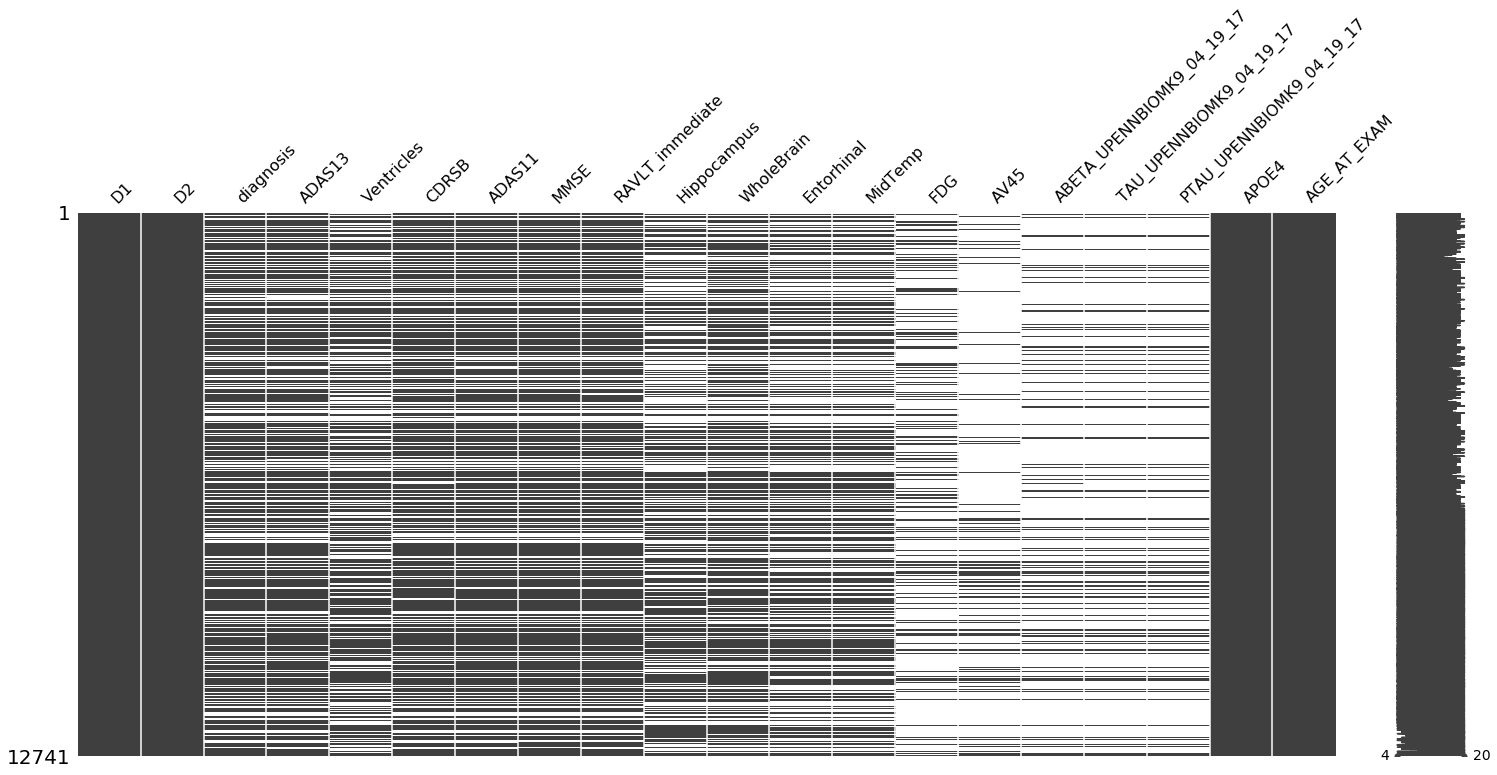

In [98]:
import missingno as msno

# This visualises the distribution of NaNs throughout 
# the dataset. Each NaN shows as a white line, and 
# each value shows as a black line.
msno.matrix(df[columns_of_interest])

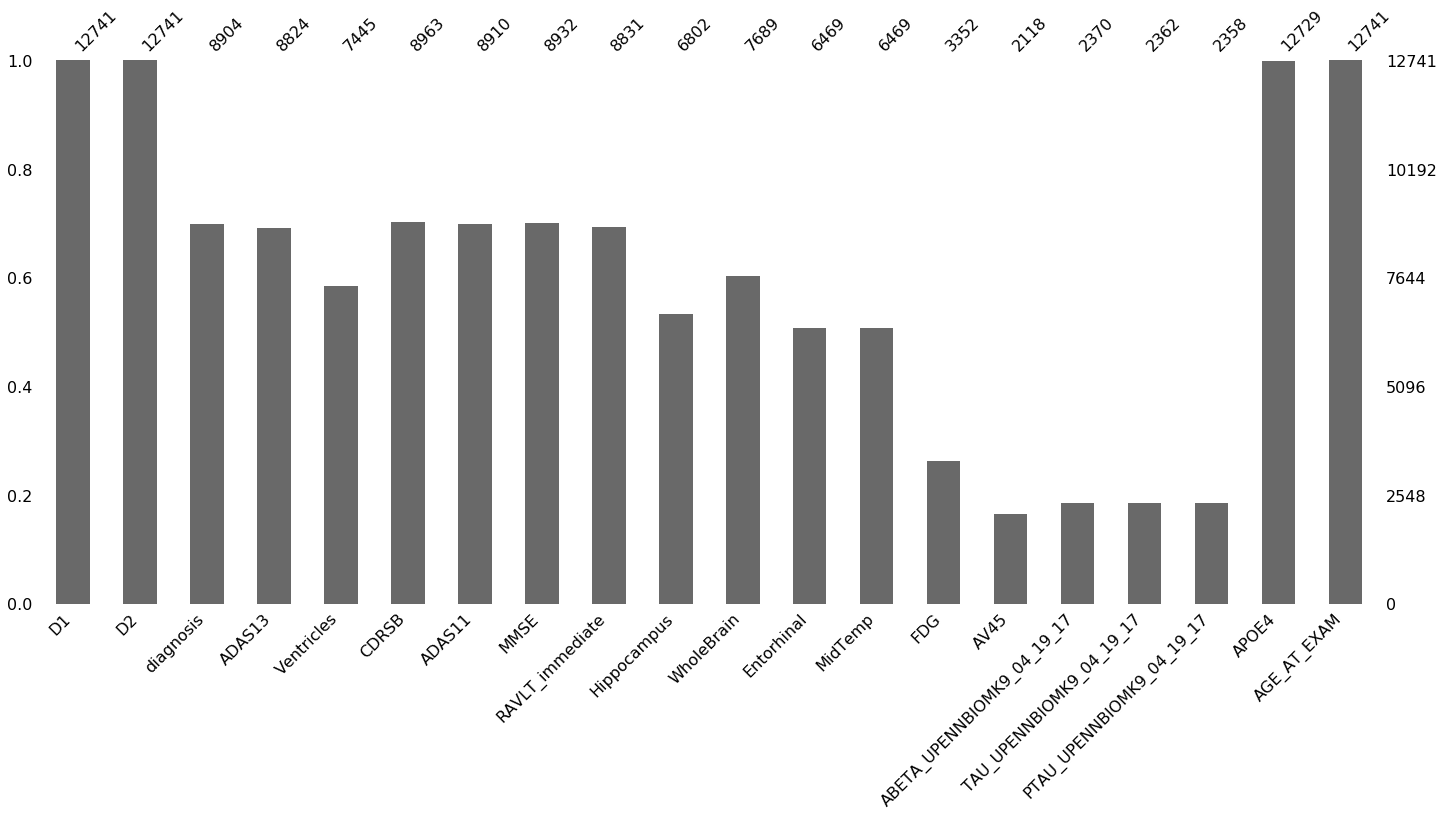

In [99]:
# Same deal as above; this is a bar chart of the number
# of values for each feature.
msno.bar(df[columns_of_interest])

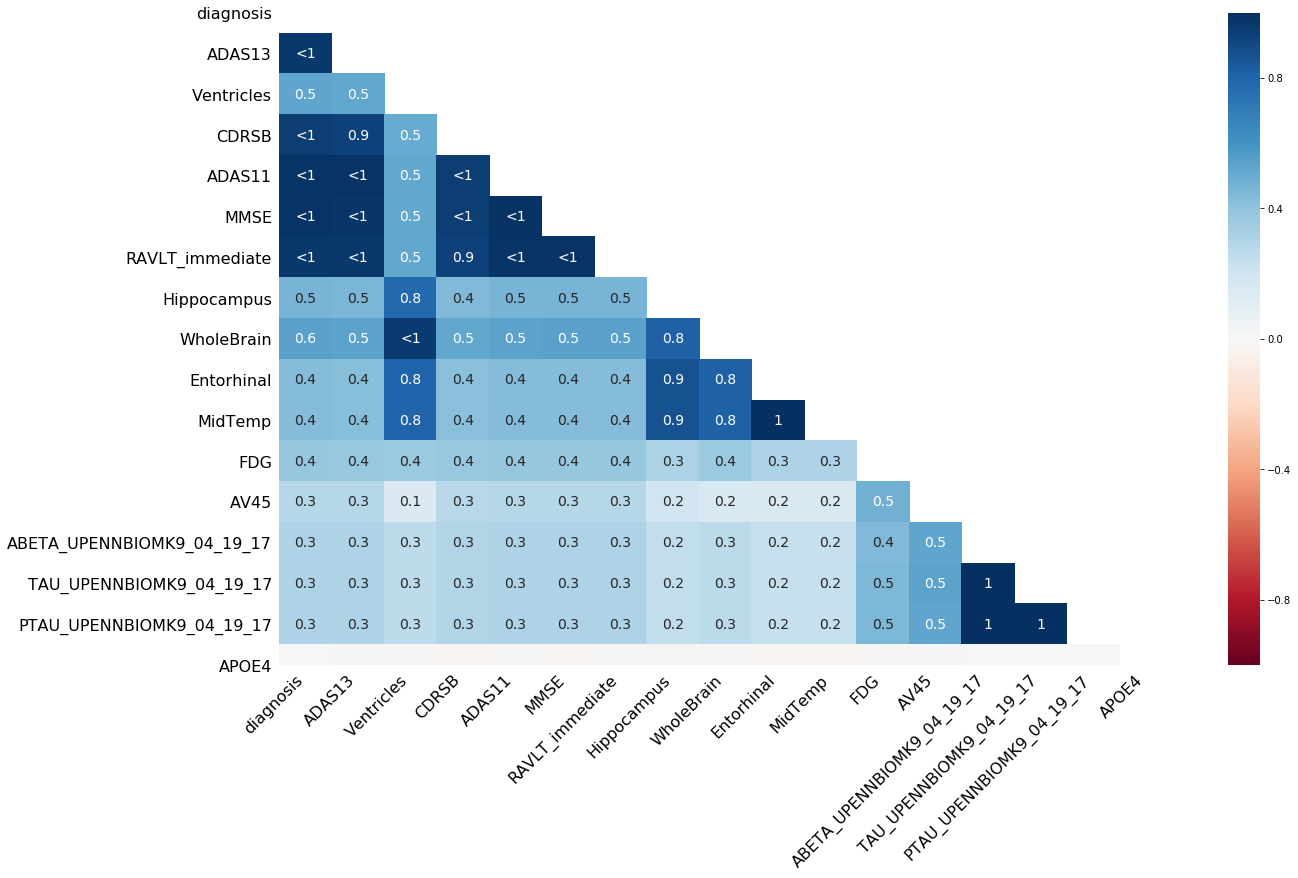

In [22]:
# A `seaborn` heatmap visualization of nullity correlation.
# 1 siginifies that if one value is missing then the other
# is likely to be missing, -1 signifies that if one value
# is present then the other is likely to be missing.
msno.heatmap(df[columns_of_interest])

## Benchmarks

### Making the benchmark datasets

In [101]:
# lets exclude the number of 
# excluded_features = features['csf']
excluded_features = features['pet'] + features['csf']
benchmark_df = df[[feature for feature in columns_of_interest if feature not in excluded_features]].dropna()

In [102]:
benchmark_df

,D1,D2,diagnosis,ADAS13,Ventricles,CDRSB,ADAS11,MMSE,RAVLT_immediate,Hippocampus,WholeBrain,Entorhinal,MidTemp,APOE4,AGE_AT_EXAM
0,1,1,CN,18.67,118233.0,0.0,10.67,28.0,44.0,8336.0,1229740.0,4177.0,27936.0,0.0,74.300000
1,1,0,AD,31.00,84599.0,4.5,22.00,20.0,22.0,5319.0,1129830.0,1791.0,18422.0,1.0,81.300000
2,1,0,AD,30.00,88580.0,6.0,19.00,24.0,19.0,5446.0,1100060.0,2427.0,16972.0,1.0,81.798289
3,1,0,AD,35.00,90099.0,3.5,24.00,17.0,31.0,5157.0,1095640.0,1596.0,17330.0,1.0,82.299316
4,1,0,AD,37.67,97420.0,8.0,25.67,19.0,23.0,5139.0,1088560.0,1175.0,16398.0,1.0,82.794867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12275,1,1,CN,7.00,12472.0,0.0,6.00,30.0,52.0,7424.0,1010220.0,3970.0,19348.0,1.0,69.017796
5588,1,1,CN,5.00,14873.0,0.0,3.00,30.0,41.0,7102.0,985330.0,3789.0,17767.0,0.0,74.300000
12276,1,1,CN,5.00,17160.0,0.5,3.00,29.0,31.0,6918.0,980610.0,3791.0,17196.0,0.0,76.317796
5587,1,1,CN,11.00,21884.0,0.0,8.00,30.0,49.0,8119.0,1077990.0,4498.0,21762.0,1.0,68.500000


In [103]:
df['APOE4'].value_counts() / len(df)
# hmm this is a problem...
# why are there 2s in the APOE4 column?

0.0    0.552939
1.0    0.355467
2.0    0.090652
Name: APOE4, dtype: float64

In [104]:
# drop 2s in the APOE4 values as a quick fix for now...
benchmark_no2s_df = benchmark_df[benchmark_df['APOE4'] != 2.]
benchmark_no2s_df

,D1,D2,diagnosis,ADAS13,Ventricles,CDRSB,ADAS11,MMSE,RAVLT_immediate,Hippocampus,WholeBrain,Entorhinal,MidTemp,APOE4,AGE_AT_EXAM
0,1,1,CN,18.67,118233.0,0.0,10.67,28.0,44.0,8336.0,1229740.0,4177.0,27936.0,0.0,74.300000
1,1,0,AD,31.00,84599.0,4.5,22.00,20.0,22.0,5319.0,1129830.0,1791.0,18422.0,1.0,81.300000
2,1,0,AD,30.00,88580.0,6.0,19.00,24.0,19.0,5446.0,1100060.0,2427.0,16972.0,1.0,81.798289
3,1,0,AD,35.00,90099.0,3.5,24.00,17.0,31.0,5157.0,1095640.0,1596.0,17330.0,1.0,82.299316
4,1,0,AD,37.67,97420.0,8.0,25.67,19.0,23.0,5139.0,1088560.0,1175.0,16398.0,1.0,82.794867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12275,1,1,CN,7.00,12472.0,0.0,6.00,30.0,52.0,7424.0,1010220.0,3970.0,19348.0,1.0,69.017796
5588,1,1,CN,5.00,14873.0,0.0,3.00,30.0,41.0,7102.0,985330.0,3789.0,17767.0,0.0,74.300000
12276,1,1,CN,5.00,17160.0,0.5,3.00,29.0,31.0,6918.0,980610.0,3791.0,17196.0,0.0,76.317796
5587,1,1,CN,11.00,21884.0,0.0,8.00,30.0,49.0,8119.0,1077990.0,4498.0,21762.0,1.0,68.500000


In [106]:
# check for -4 in the data (signifies NaNs)
benchmark_no2s_df.min()

D1                      0
D2                      0
diagnosis              AD
ADAS13                  0
Ventricles           5650
CDRSB                   0
ADAS11                  0
MMSE                    5
RAVLT_immediate         0
Hippocampus          2347
WholeBrain         649091
Entorhinal           1041
MidTemp              8788
APOE4                   0
AGE_AT_EXAM          54.4
dtype: object

In [114]:
# seperate train and test sets based on whether participant is in D2
# we're treating each visit as a seperate sample from the disease progression

train = benchmark_no2s_df[benchmark_no2s_df['D2'] != 1]
test = benchmark_no2s_df[benchmark_no2s_df['D2'] == 1]

assert len(train) + len(test) == len(benchmark_no2s_df)

print(f'train set size: {len(train)}')
print(f'test set size: {len(test)}')
print(f'full set size: {len(benchmark_no2s_df)}')

# hmm... looks like we have a larger test set than training set...

train set size: 2125
test set size: 2707
full set size: 4832


In [ ]:
# perhaps we should split the data set in an 80:20 proportion for simplicity
# assuming that each visit as a seperate sample from the disease progression



### Last Visit

In [ ]:
# 

### SVM

In [ ]:
'''
read csv
features = ['RID','Diagnosis','AGE', 'ADAS13','Ventricles','ICV_bl']
force values to numeric --> using pd.to_numeric() which we'll have already done
sort dataframe based on age
split into train and test
'''
csv_dir = ''
train_csv = ''
test_csv = ''

train_df = pd.read_csv(os.path.join(csv_dir, train_csv))
test_df = pd.read_csv(os.path.join(csv_dir, test_csv))

train_features = []
test_features = []

# train = train_features[train_features].to_numpy()
# test = test_features[test_features].to_numpy()

